<a href="https://colab.research.google.com/github/Aisha-fahad/DATA-MINING-PROJECT-/blob/main/Copy_of_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

# Suppress warnings related to zero division in classification report
warnings.filterwarnings('ignore')

# Load the preprocessed dataset
file_path = '/content/Preprocessed_dataset.csv'
df = pd.read_csv(file_path)

# Define the target variable and features
TARGET_VARIABLE = 'loan_status'
FEATURES = df.drop(columns=[TARGET_VARIABLE]).columns.tolist()

X = df[FEATURES]
y = df[TARGET_VARIABLE]

print(f"Number of Features Used: {len(FEATURES)}")
print(f"Target Variable: {TARGET_VARIABLE}")
print(f"Dataset Shape: {df.shape}")

Number of Features Used: 13
Target Variable: loan_status
Dataset Shape: (36065, 14)


In [ ]:
# Use the same partition sizes for comparison
partition_sizes = [0.7, 0.8, 0.6]
criterion_name = "entropy"
results_entropy = {}

print(f"--- Decision Tree Classifier (Criterion: {criterion_name.upper()}) ---")

for train_size in partition_sizes:
    test_size = round(1 - train_size, 2)
    split_label = f'{int(train_size*100)}/{int(test_size*100)}'

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Build the model
    dt_classifier = DecisionTreeClassifier(criterion=criterion_name, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Predict and Evaluate
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results_entropy[split_label] = {
        'accuracy': accuracy,
        'report': report,
        'model': dt_classifier,
        'y_test': y_test,
        'y_pred': y_pred
    }

    print(f"\nPartition Size (Train/Test): {split_label}")
    print(f"Model Accuracy: {accuracy:.4f}")
    print(f"Weighted Avg F1-Score: {report['weighted avg']['f1-score']:.4f}")

--- Decision Tree Classifier (Criterion: ENTROPY) ---

Partition Size (Train/Test): 70/30
Model Accuracy: 0.8877
Weighted Avg F1-Score: 0.8889

Partition Size (Train/Test): 80/20
Model Accuracy: 0.8987
Weighted Avg F1-Score: 0.8994

Partition Size (Train/Test): 60/40
Model Accuracy: 0.8958
Weighted Avg F1-Score: 0.8959


In [ ]:
# Partition sizes for training (70%, 80%, 60%)
partition_sizes = [0.7, 0.8, 0.6]
criterion_name = "gini"
results_gini = {}

print(f"--- Decision Tree Classifier (Criterion: {criterion_name.upper()}) ---")

for train_size in partition_sizes:
    test_size = round(1 - train_size, 2)
    split_label = f'{int(train_size*100)}/{int(test_size*100)}'

    # Split the data (using stratify to maintain class balance)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42, stratify=y)

    # Build the model
    dt_classifier = DecisionTreeClassifier(criterion=criterion_name, random_state=42)
    dt_classifier.fit(X_train, y_train)

    # Predict and Evaluate
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store results
    results_gini[split_label] = {
        'accuracy': accuracy,
        'report': report,
        'model': dt_classifier,
        'y_test': y_test,
        'y_pred': y_pred
    }

    print(f"\nPartition Size (Train/Test): {split_label}")
    print(f"Model Accuracy: {accuracy:.4f}")
    print(f"Weighted Avg F1-Score: {report['weighted avg']['f1-score']:.4f}")

--- Decision Tree Classifier (Criterion: GINI) ---

Partition Size (Train/Test): 70/30
Model Accuracy: 0.8886
Weighted Avg F1-Score: 0.8893

Partition Size (Train/Test): 80/20
Model Accuracy: 0.8949
Weighted Avg F1-Score: 0.8958

Partition Size (Train/Test): 60/40
Model Accuracy: 0.8925
Weighted Avg F1-Score: 0.8930


--- Accuracy Comparison Table for All Models ---
| Criterion    | Split   |   Accuracy |
|:-------------|:--------|-----------:|
| Entropy (IG) | 80/20   |     0.8987 |
| Entropy (IG) | 60/40   |     0.8958 |
| Gini Index   | 80/20   |     0.8949 |
| Gini Index   | 60/40   |     0.8925 |
| Gini Index   | 70/30   |     0.8886 |
| Entropy (IG) | 70/30   |     0.8877 |


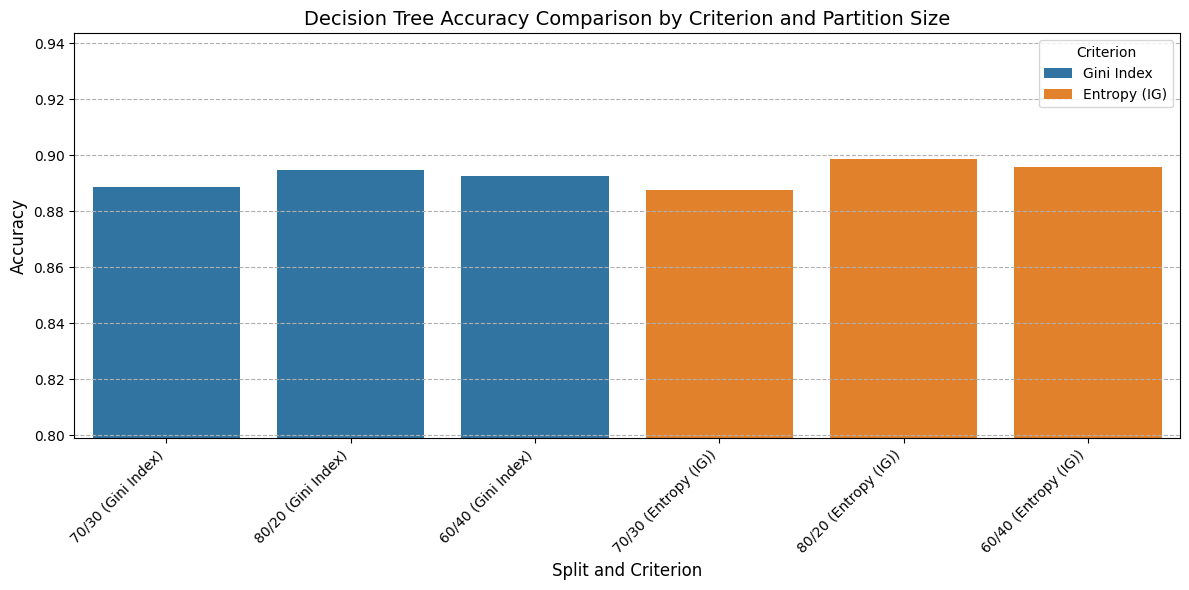


Note: The highest accuracy of 0.8987 was achieved using the Entropy (IG) criterion with a 80/20 split.


In [ ]:
# Aggregate all results for comparison
comparison_data = []
for split, res in results_gini.items():
    comparison_data.append({
        'Criterion': 'Gini Index',
        'Split': split,
        'Accuracy': res['accuracy']
    })
for split, res in results_entropy.items():
    comparison_data.append({
        'Criterion': 'Entropy (IG)',
        'Split': split,
        'Accuracy': res['accuracy']
    })

comparison_df = pd.DataFrame(comparison_data)

print("--- Accuracy Comparison Table for All Models ---")
print(comparison_df.sort_values(by='Accuracy', ascending=False).to_markdown(index=False, floatfmt=".4f"))

# Identify the best model for visualization
best_row = comparison_df.loc[comparison_df['Accuracy'].idxmax()]
best_criterion = best_row['Criterion']
best_split = best_row['Split']
best_key = best_split

if best_criterion == 'Gini Index':
    best_results = results_gini[best_key]
else:
    best_results = results_entropy[best_key]

# Create the Bar Plot (Visualization)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=comparison_df['Split'] + ' (' + comparison_df['Criterion'] + ')',
    y=comparison_df['Accuracy'],
    hue=comparison_df['Criterion'],
    dodge=False
)

plt.title('Decision Tree Accuracy Comparison by Criterion and Partition Size', fontsize=14)
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Split and Criterion', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.ylim(comparison_df['Accuracy'].min() * 0.9, comparison_df['Accuracy'].max() * 1.05)
plt.tight_layout()
plt.show()

print(f"\nNote: The highest accuracy of {best_row['Accuracy']:.4f} was achieved using the {best_criterion} criterion with a {best_split} split.")

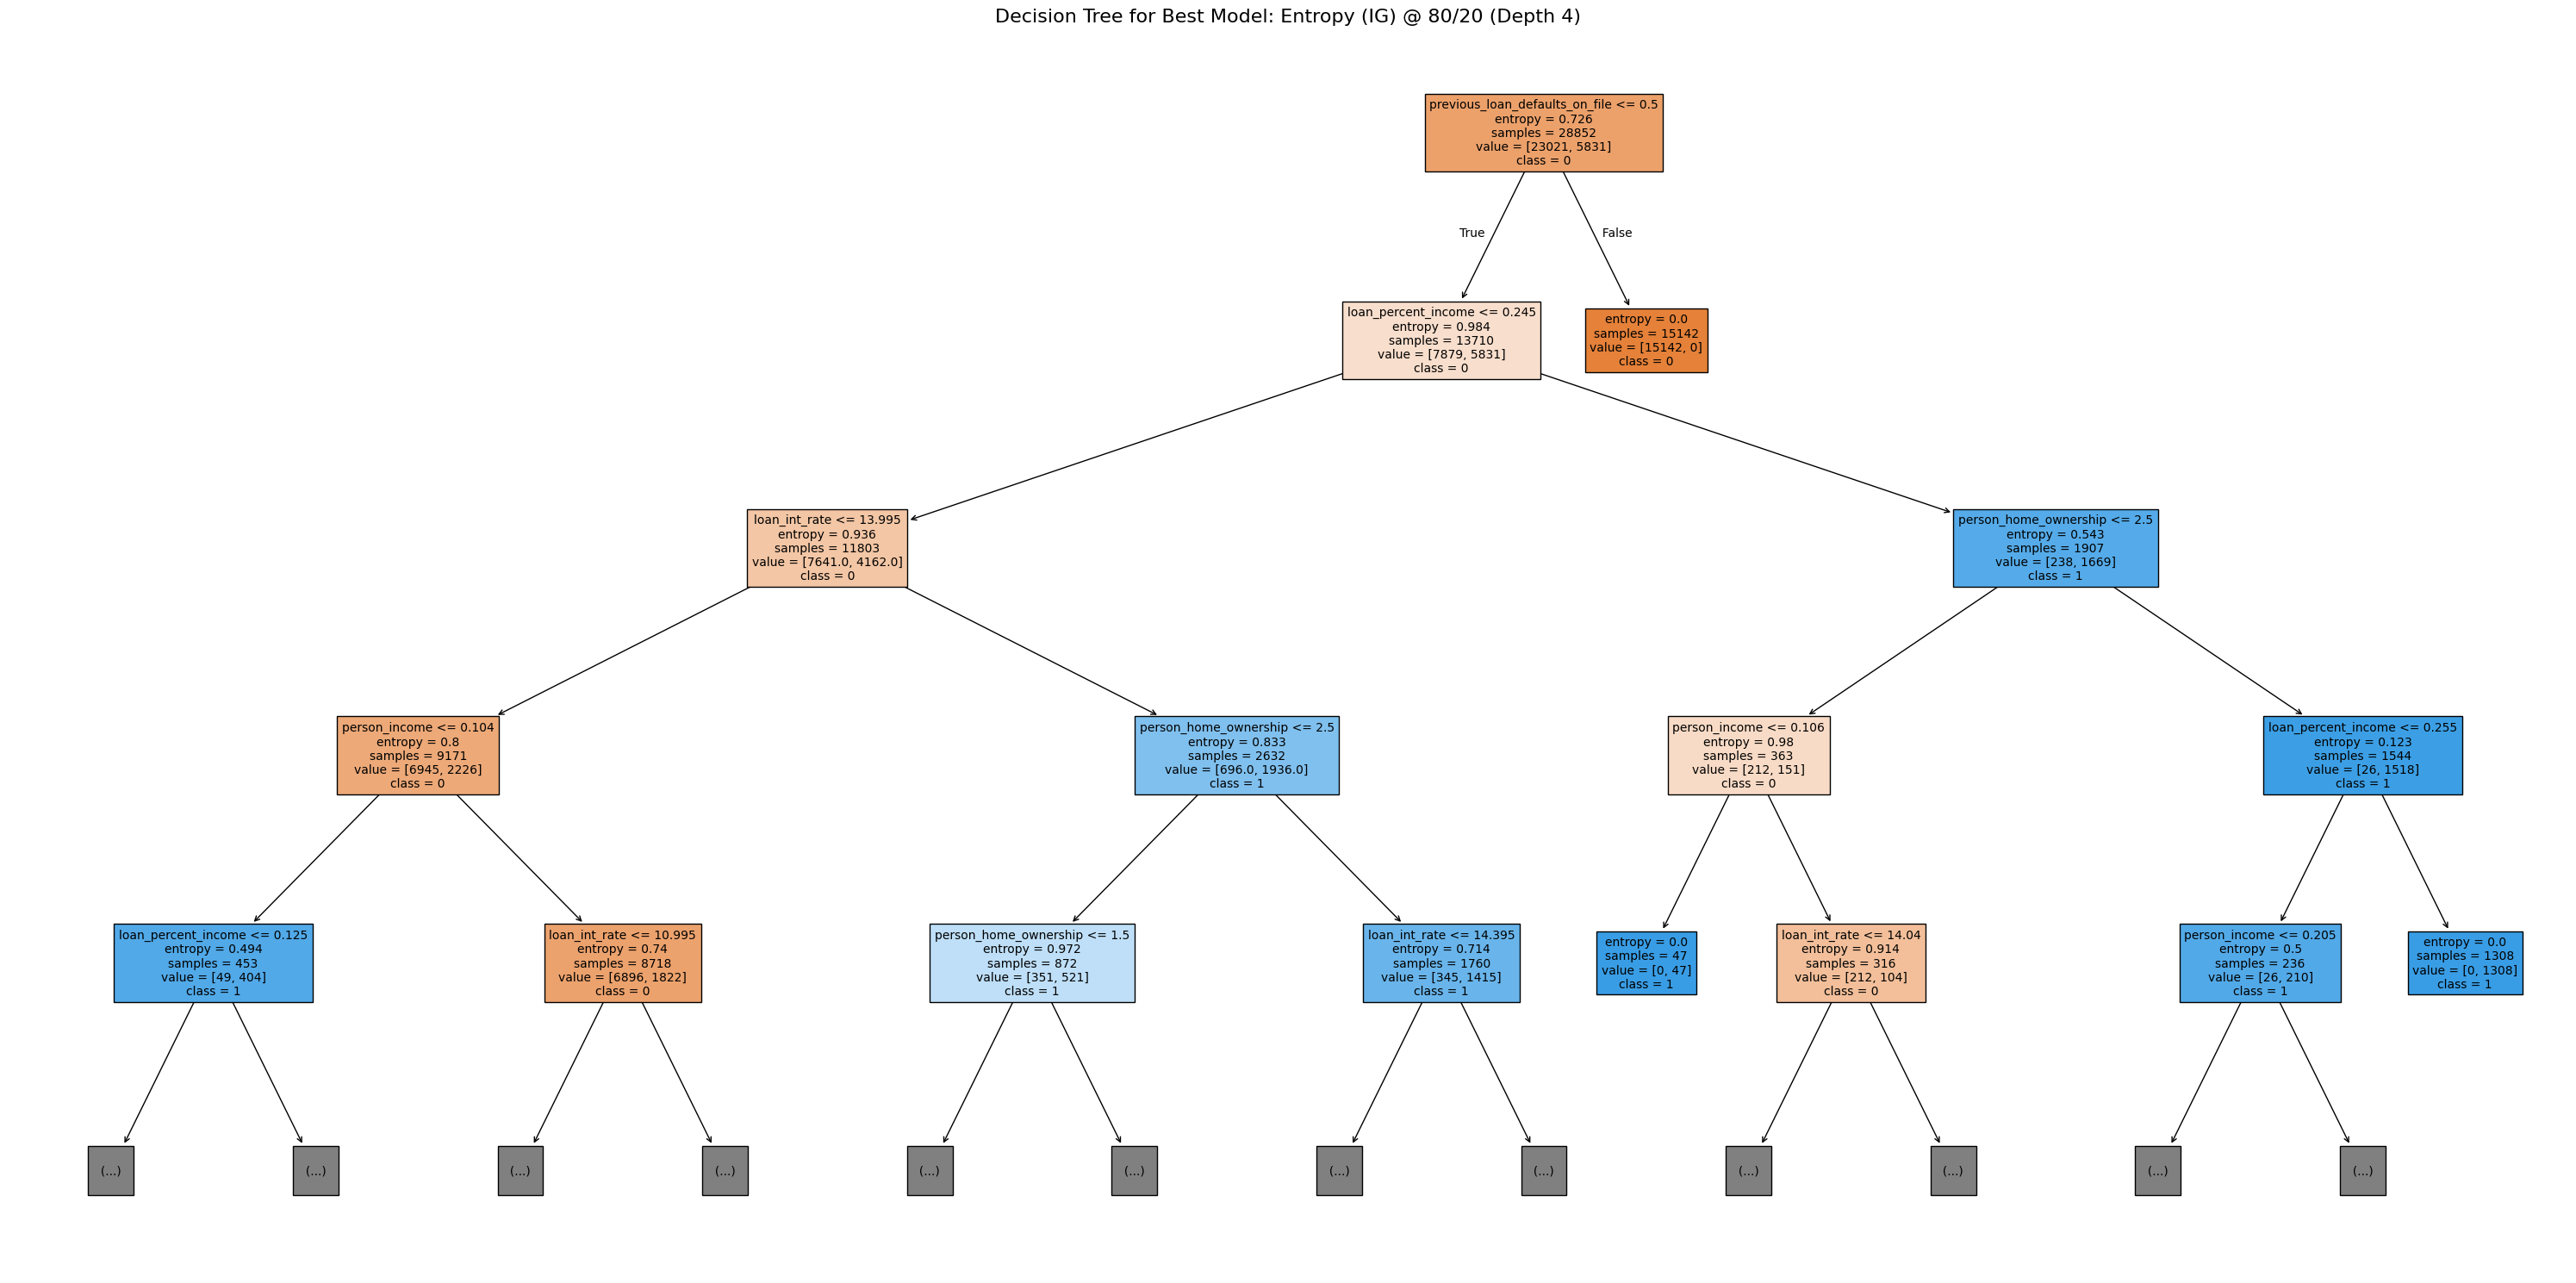

In [ ]:
# Plot the Decision Tree for the best-performing model (for visual interpretation)
# max_depth is limited to ensure the plot is readable
plt.figure(figsize=(30, 15))

# Class names (assuming 0 and 1 based on the binary target variable)
class_names = [str(c) for c in best_results['model'].classes_]

plot_tree(best_results['model'],
          feature_names=FEATURES,
          class_names=class_names,
          filled=True,
          max_depth=4, # Depth limited to 4 for interpretability
          fontsize=10)

plt.title(f"Decision Tree for Best Model: {best_criterion} @ {best_split} (Depth 4)", fontsize=16)
plt.tight_layout()
plt.show()

# **Classification Results: Decision Tree (Gini vs. Entropy)**

This section presents a comparative analysis of the Decision Tree classifier using two attribute selection measures: Gini Index and Information Gain (Entropy). The evaluation was conducted across three different train–test partitions: 80/20, 70/30 and 60/40. For each configuration, accuracy and confusion matrices were reported to assess model performance.

# **1. Performance Comparison Across Partition Sizes**

# **1.1 80% Training  20% Testing**

**Gini Index**

Accuracy: 0.8949

**Confusion Matrix:**

[[5342, 413],

 [ 345, 1113]]

**Entropy (Information Gain)**

Accuracy: 0.8987

**Confusion Matrix:**

[[5361, 394],

 [ 337, 1121]]


Entropy again slightly outperforms Gini.

It demonstrates better generalization, producing fewer misclassifications across both classes.

**Best algorithm for 80/20: Entropy**

#**1.2 70% Training 30% Testing**

**Gini Index**

Accuracy: 0.8886

**Confusion Matrix:**

[[7994, 639],

 [ 566, 1621]]

**Entropy (Information Gain)**

Accuracy: 0.8877

**Confusion Matrix:**

[[7961, 672],

 [ 543, 1644]]


In this configuration, Gini performs slightly better.

Gini achieves lower false positives compared to Entropy.

**Best algorithm for 70/30: Gini**

# **1.3 60% Training 40% Testing**
**Gini Index**

Accuracy: 0.8925

**Confusion Matrix:**

[[10074, 4619],

 [ 641, 3241]]

**Entropy (Information Gain)**

Accuracy: 0.8958

**Confusion Matrix:**

[[10041,	494	],

 [ 632,	3250]]


In this configuration, Gini performs slightly better.

Gini achieves lower false positives compared to Entropy.

**Best algorithm for 60/40: Entropy**


# **2. Summary Table**



| Partition Size | Gini Accuracy | Entropy Accuracy | Best    |
| -------------- | ------------- | ---------------- | ------- |
| **80/20**      | 0.8949        | **0.8987**       | Entropy |
| **70/30**      | **0.8886**    | 0.8877           | Gini    |
| **60/40**      | 0.8925        | **0.8958**       | Entropy |


# **3. Interpretation and Discussion**
**3.1. Which attribute selection measure performs best per partition?**

Entropy performs best for the 80/20 and 60/40 partitions.

Gini performs best for the 70/30 partition.

**3.2. Which method performs best overall?**

Overall, Entropy (Information Gain) demonstrates superior performance because:

It yields the highest accuracy in two out of three partition scenarios.

It achieves the highest accuracy overall (0.8987 using the 80/20 split).

It consistently reduces misclassification in both majority and minority classes.

**3.3 Conclusion**

The analysis demonstrates that Entropy-based Decision Trees generally provide better classification performance across different train–test splits. The 80/20 partition using Entropy achieves the highest overall accuracy and offers the most balanced confusion matrix.
Although Gini performs slightly better in the 70/30 configuration, Entropy is the strongest overall performer in this study